In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm

In [9]:
n = 50000
np.random.seed(42)

EAD = [1000, 2000, 2500]
PD = [[ 0.02, 0.007],[0.01, 0.005],[0.015, 0.01]]
LGD = [[0, 0.2, 1],[0, 0.3, 1],[0, 0.4, 1]]

def pert(a, b, c, *, size = n, lamb = 4):
    alpha = 1 + lamb * (b - a) / (c - a)
    beta = 1 + lamb * (c - b) / (c - a)
    return(a + np.random.beta(alpha, beta, size = size) * (c - a))

def log_m_s(mean,sigma):
    sqr = np.sqrt(mean**4/(mean**2 + sigma**2))
    M = np.log(sqr)
    S = np.sqrt(2*np.log(mean/sqr))
    return M, S

list_log = [log_m_s(mean,sigma) for mean,sigma in PD ]



exposure_at_dafault = np.array([np.full(n, 1000), np.full(n, 2000), np.full(n, 2500)])

probability_of_default = np.array([np.random.lognormal(M,S,n) for M, S in list_log ])

loss_given_default = np.array([pert(0, 0.2, 1, size = n), pert(0, 0.3, 1, size = n), pert(0, 0.4, 1, size = n)])


expected_losses = exposure_at_dafault * probability_of_default * loss_given_default

Моделируем вероятность дефолта (probability_of_default) и  процент убытков после наступления дефолта (loss_given_default), затем ищем ожидаемые потери (expected_losses)

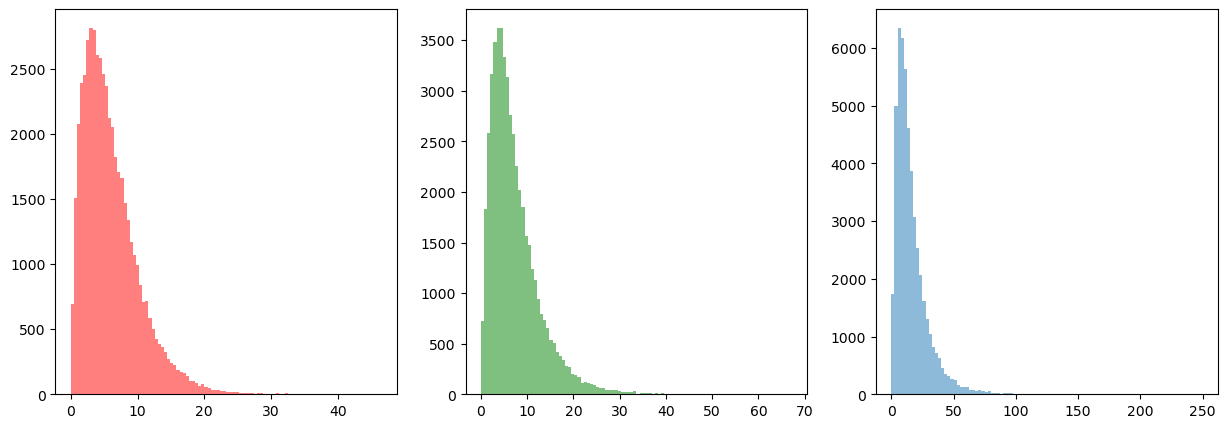

In [10]:
fig,ax = plt.subplots(1, 3, figsize = (15,5))

ax[0].hist(expected_losses[0], bins = 100, color = 'red', alpha = 0.5);
ax[1].hist(expected_losses[1], bins = 100, color = 'green', alpha = 0.5);
ax[2].hist(expected_losses[2], bins = 100, alpha = 0.5);

plt.show()


Строим графики для трёх кредитов A, B, C

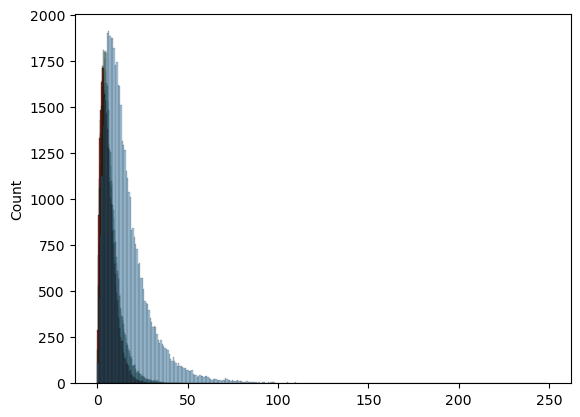

In [11]:
sns.histplot(expected_losses[0], color = 'red', alpha = 0.7);
sns.histplot(expected_losses[1], color = 'green', alpha = 0.2);
sns.histplot(expected_losses[2], alpha = 0.4);

Общий график

In [12]:
expected_losses_all = np.sum(expected_losses, axis = 0)

expected_losses_mean = np.mean(expected_losses_all)
expected_losses_median = np.median(expected_losses_all)
expected_losses_percentile = np.percentile(expected_losses_all, 95)

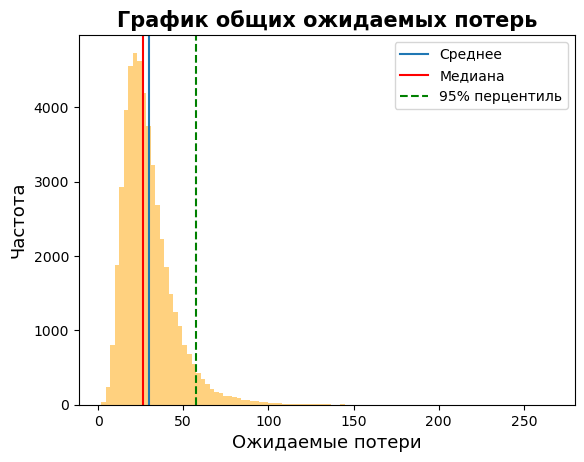

In [13]:
plt.hist(expected_losses_all, bins = 100, alpha = 0.5,color ='orange');

plt.axvline(expected_losses_mean, label = 'Среднее')
plt.axvline(expected_losses_median, label = 'Медиана', color = 'red');
plt.axvline(expected_losses_percentile, label = '95% перцентиль', color = 'green', linestyle = '--')

plt.xlabel('Ожидаемые потери', fontsize = 13)
plt.ylabel('Частота', fontsize = 13)
plt.title('График общих ожидаемых потерь', fontweight = "bold", fontsize = 15)
plt.legend();

In [14]:
print('Среднее:', np.mean(expected_losses_all))
print('Медиана:', np.median(expected_losses_all))
print('95% перцентиль:', np.percentile(expected_losses_all, 95))

Среднее: 29.62399509979647
Медиана: 26.440926770304173
95% перцентиль: 57.422955427638755


С помощью метода Монте-Карло мы нашли 95% перцентиль (приблизительно 57,4), который будет являться ожидаемыми потерями (expected_losses) и нашей "подушкой безопасности". Из этого можно сделать вывод, что следует увеличить необходимые резервы для компенсации возможных потерь, с 25 (изначально высчитанные ожидаемые потери, без использования метода Монте-Карло) до 57,4.